# Projeto Mestrado - Calibração de Erros no Torno Mecânico

## Bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Importando bases de dados

In [42]:
# Dados das medições com deslocamento transversal de 0 mm
dados_0mm_semrev_ida = pd.read_excel('Medição_0mm_semrev.xlsx', 'Ida')
dados_0mm_semrev_volta = pd.read_excel('Medição_0mm_semrev.xlsx', 'Volta')
dados_0mm_comrev_ida = pd.read_excel('Medição_0mm_comrev.xlsx', 'Ida')
dados_0mm_comrev_volta = pd.read_excel('Medição_0mm_comrev.xlsx', 'Volta')

# Dados das medições com deslocamento transversal de 100 mm
dados_100mm_semrev_ida = pd.read_excel('Medição_100mm_semrev.xlsx', 'Ida')
dados_100mm_semrev_volta = pd.read_excel('Medição_100mm_semrev.xlsx', 'Volta')
dados_100mm_comrev_ida = pd.read_excel('Medição_100mm_comrev.xlsx', 'Ida')
dados_100mm_comrev_volta = pd.read_excel('Medição_100mm_comrev.xlsx', 'Volta')

# Dados das medições com deslocamento transversal de 200 mm
dados_200mm_semrev_ida = pd.read_excel('Medição_200mm_semrev.xlsx', 'Ida')
dados_200mm_semrev_volta = pd.read_excel('Medição_200mm_semrev.xlsx', 'Volta')
dados_200mm_comrev_ida = pd.read_excel('Medição_200mm_comrev.xlsx', 'Ida')
dados_200mm_comrev_volta = pd.read_excel('Medição_200mm_comrev.xlsx', 'Volta')

# Dados das medições com deslocamento transversal de 300 mm
dados_300mm_semrev_ida = pd.read_excel('Medição_300mm_semrev.xlsx', 'Ida')
dados_300mm_semrev_volta = pd.read_excel('Medição_300mm_semrev.xlsx', 'Volta')
dados_300mm_comrev_ida = pd.read_excel('Medição_300mm_comrev.xlsx', 'Ida')
dados_300mm_comrev_volta = pd.read_excel('Medição_300mm_comrev.xlsx', 'Volta')

ERROR! Session/line number was not unique in database. History logging moved to new session 55


## Análise prévia dos dados

In [43]:
dados_0mm_semrev_ida

,Posição (mm),Med1 (mm),Med2 (mm),Med3 (mm),Med4 (mm)
0,0,0.0000,0.0000,0.0000,0.0000
1,40,-0.0455,-0.0456,-0.0463,-0.0468
2,80,-0.0985,-0.0990,-0.0993,-0.0989
3,120,-0.1585,-0.1589,-0.1597,-0.1597
4,160,-0.2235,-0.2237,-0.2249,-0.2251
5,200,-0.2801,-0.2813,-0.2811,-0.2808
6,240,-0.3254,-0.3263,-0.3275,-0.3269
7,280,-0.3778,-0.3782,-0.3791,-0.3791
8,320,-0.4215,-0.4220,-0.4223,-0.4218
9,360,-0.4592,-0.4595,-0.4597,-0.4597


In [44]:
dados_0mm_semrev_ida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Posição (mm)  18 non-null     int64  
 1   Med1 (mm)     18 non-null     float64
 2   Med2 (mm)     18 non-null     float64
 3   Med3 (mm)     18 non-null     float64
 4   Med4 (mm)     18 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 848.0 bytes


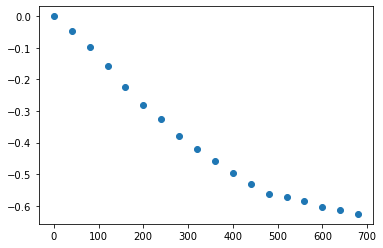

In [45]:
plt.scatter(dados_0mm_semrev_ida['Posição (mm)'], dados_0mm_semrev_ida['Med1 (mm)'])

## Tratamento inicial dos dados

### Função passar para micrometros, renomear colunas e corrigir desalinhamento pelo método dos mínimos quadrados

In [46]:
def ajuste(df):
    
    # Passando para micrometros
    df['Med1 (mm)'] = df['Med1 (mm)'] * 1000
    df['Med2 (mm)'] = df['Med2 (mm)'] * 1000
    df['Med3 (mm)'] = df['Med3 (mm)'] * 1000
    df['Med4 (mm)'] = df['Med4 (mm)'] * 1000

    # Renomeando as colunas
    df.rename(columns={'Med1 (mm)': 'Med1 (\u03BCm)', 'Med2 (mm)': 'Med2 (\u03BCm)',
                       'Med3 (mm)': 'Med3 (\u03BCm)', 'Med4 (mm)': 'Med4 (\u03BCm)'}, inplace = True)
    
    # Média das medições
    df['Média Medições'] = (df['Med1 (\u03BCm)'] + df['Med2 (\u03BCm)'] + df['Med3 (\u03BCm)'] + df['Med4 (\u03BCm)']) / 4
    
    # Mínimos quadrados - medição 1
    x1 = df['Posição (mm)']
    y1 = df['Med1 (\u03BCm)']
    a1, b1, r1, p_value1, std_err1 = linregress(x1, y1)
    df["Ajuste 1"] = a1 * x1 + b1
    
    # Mínimos quadrados - medição 2
    x2 = df['Posição (mm)']
    y2 = df['Med2 (\u03BCm)']
    a2, b2, r2, p_value2, std_err2 = linregress(x2, y2)
    df["Ajuste 2"] = a2 * x2 + b2
    
    # Mínimos quadrados - medição 3
    x3 = df['Posição (mm)']
    y3 = df['Med3 (\u03BCm)']
    a3, b3, r3, p_value3, std_err3 = linregress(x3, y3)
    df["Ajuste 3"] = a3 * x3 + b3
    
    # Mínimos quadrados - medição 4
    x4 = df['Posição (mm)']
    y4 = df['Med4 (\u03BCm)']
    a4, b4, r4, p_value4, std_err4 = linregress(x4, y4)
    df["Ajuste 4"] = a4 * x4 + b4
    
    # Ajuste médio
    df['Ajuste médio'] = (df["Ajuste 1"] + df["Ajuste 2"] + df["Ajuste 3"] + df["Ajuste 4"]) / 4
    
    # Correção desalinhamentos
    df['Valor alinhado med1'] = df['Med1 (\u03BCm)'] - df['Ajuste 1']
    df['Valor alinhado med2'] = df['Med2 (\u03BCm)'] - df['Ajuste 2']
    df['Valor alinhado med3'] = df['Med3 (\u03BCm)'] - df['Ajuste 3']
    df['Valor alinhado med4'] = df['Med4 (\u03BCm)'] - df['Ajuste 4']
    
    # Zerando ponto inicial
    df['Resultado alinhado 1'] = df['Valor alinhado med1'] - df['Valor alinhado med1'][0]
    df['Resultado alinhado 2'] = df['Valor alinhado med2'] - df['Valor alinhado med2'][0]
    df['Resultado alinhado 3'] = df['Valor alinhado med3'] - df['Valor alinhado med3'][0]
    df['Resultado alinhado 4'] = df['Valor alinhado med4'] - df['Valor alinhado med4'][0]
    
    # Resultado alinhado médio
    df['Resultado alinhado médio'] = (df['Resultado alinhado 1'] + df['Resultado alinhado 2'] + 
                                      df['Resultado alinhado 3'] + df['Resultado alinhado 4']) / 4
    
    return df

In [47]:
# 0 mm
dados_0mm_semrev_ida = ajuste(dados_0mm_semrev_ida)
dados_0mm_semrev_volta = ajuste(dados_0mm_semrev_volta)
dados_0mm_comrev_ida = ajuste(dados_0mm_comrev_ida)
dados_0mm_comrev_volta = ajuste(dados_0mm_comrev_volta)

# 100 mm
dados_100mm_semrev_ida = ajuste(dados_100mm_semrev_ida)
dados_100mm_semrev_volta = ajuste(dados_100mm_semrev_volta)
dados_100mm_comrev_ida = ajuste(dados_100mm_comrev_ida)
dados_100mm_comrev_volta = ajuste(dados_100mm_comrev_volta)

# 200 mm
dados_200mm_semrev_ida = ajuste(dados_200mm_semrev_ida)
dados_200mm_semrev_volta = ajuste(dados_200mm_semrev_volta)
dados_200mm_comrev_ida = ajuste(dados_200mm_comrev_ida)
dados_200mm_comrev_volta = ajuste(dados_200mm_comrev_volta)

# 300 mm
dados_300mm_semrev_ida = ajuste(dados_300mm_semrev_ida)
dados_300mm_semrev_volta = ajuste(dados_300mm_semrev_volta)
dados_300mm_comrev_ida = ajuste(dados_300mm_comrev_ida)
dados_300mm_comrev_volta = ajuste(dados_300mm_comrev_volta)

dados_0mm_semrev_ida

,Posição (mm),Med1 (μm),Med2 (μm),Med3 (μm),Med4 (μm),Média Medições,Ajuste 1,Ajuste 2,Ajuste 3,Ajuste 4,Ajuste médio,Valor alinhado med1,Valor alinhado med2,Valor alinhado med3,Valor alinhado med4,Resultado alinhado 1,Resultado alinhado 2,Resultado alinhado 3,Resultado alinhado 4,Resultado alinhado médio
0,0,0.0,0.0,0.0,0.0,0.000,-63.743275,-64.027485,-64.836842,-64.899415,-64.376754,63.743275,64.027485,64.836842,64.899415,0.000000,0.000000,0.000000,0.000000,0.000000
1,40,-45.5,-45.6,-46.3,-46.8,-46.050,-101.872171,-102.173925,-102.916821,-102.947196,-102.477528,56.372171,56.573925,56.616821,56.147196,-7.371104,-7.453560,-8.220021,-8.752219,-7.949226
2,80,-98.5,-99.0,-99.3,-98.9,-98.925,-140.001066,-140.320365,-140.996801,-140.994978,-140.578302,41.501066,41.320365,41.696801,42.094978,-22.242208,-22.707121,-23.140041,-22.804438,-22.723452
3,120,-158.5,-158.9,-159.7,-159.7,-159.200,-178.129962,-178.466804,-179.076780,-179.042759,-178.679076,19.629962,19.566804,19.376780,19.342759,-44.113313,-44.460681,-45.460062,-45.556656,-44.897678
4,160,-223.5,-223.7,-224.9,-225.1,-224.300,-216.258858,-216.613244,-217.156760,-217.090540,-216.779850,-7.241142,-7.086756,-7.743240,-8.009460,-70.984417,-71.114241,-72.580083,-72.908875,-71.896904
5,200,-280.1,-281.3,-281.1,-280.8,-280.825,-254.387754,-254.759684,-255.236739,-255.138321,-254.880624,-25.712246,-26.540316,-25.863261,-25.661679,-89.455521,-90.567802,-90.700103,-90.561094,-90.321130
6,240,-325.4,-326.3,-327.5,-326.9,-326.525,-292.516649,-292.906123,-293.316718,-293.186103,-292.981398,-32.883351,-33.393877,-34.183282,-33.713897,-96.626625,-97.421362,-99.020124,-98.613313,-97.920356
7,280,-377.8,-378.2,-379.1,-379.1,-378.550,-330.645545,-331.052563,-331.396698,-331.233884,-331.082172,-47.154455,-47.147437,-47.703302,-47.866116,-110.897730,-111.174923,-112.540144,-112.765531,-111.844582
8,320,-421.5,-422.0,-422.3,-421.8,-421.900,-368.774441,-369.199002,-369.476677,-369.281665,-369.182946,-52.725559,-52.800998,-52.823323,-52.518335,-116.468834,-116.828483,-117.660165,-117.417750,-117.093808
9,360,-459.2,-459.5,-459.7,-459.7,-459.525,-406.903337,-407.345442,-407.556656,-407.329446,-407.283720,-52.296663,-52.154558,-52.143344,-52.370554,-116.039938,-116.182043,-116.980186,-117.269969,-116.618034


## Resultado Mínimos Quadrados

### Função genérica para plotar os gráficos

In [48]:
def desalinhamento(df_semrev_ida, df_semrev_volta, df_comrev_ida, df_comrev_volta):
    
    plt.scatter(df_semrev_ida['Posição (mm)'], df_semrev_ida['Média Medições'], label = "yi s/r_ida", marker = 'o')
    plt.plot(df_semrev_ida['Posição (mm)'], df_semrev_ida['Ajuste médio'], label = "yi' s/r_ida", ls = ':')
    plt.scatter(df_semrev_volta['Posição (mm)'], df_semrev_volta['Média Medições'], label = "yi s/r_volta", marker = 'x')
    plt.plot(df_semrev_volta['Posição (mm)'], df_semrev_volta['Ajuste médio'], label = "yi' s/r_volta", ls = '--')

    plt.scatter(df_comrev_ida['Posição (mm)'], df_comrev_ida['Média Medições'], label = "yi c/r_ida", marker = 's')
    plt.plot(df_comrev_ida['Posição (mm)'], df_comrev_ida['Ajuste médio'], label = "yi' c/r_ida", ls = ':')
    plt.scatter(df_comrev_volta['Posição (mm)'], df_comrev_volta['Média Medições'], label = "yi c/r_volta", marker='^')
    plt.plot(df_comrev_volta['Posição (mm)'], df_comrev_volta['Ajuste médio'], label = "yi' c/r_volta", ls='--')

    plt.xlabel("Deslocamento Longitudinal (mm)", fontsize = 14)
    plt.ylabel("Desvio de retitude (\u03BCm)", fontsize = 14)
    plt.legend(loc=3, ncol=2)
    plt.grid(color='grey', ls='-', lw=0.5)
    plt.xticks(df_semrev_ida['Posição (mm)'])

### Plotando os gráficos

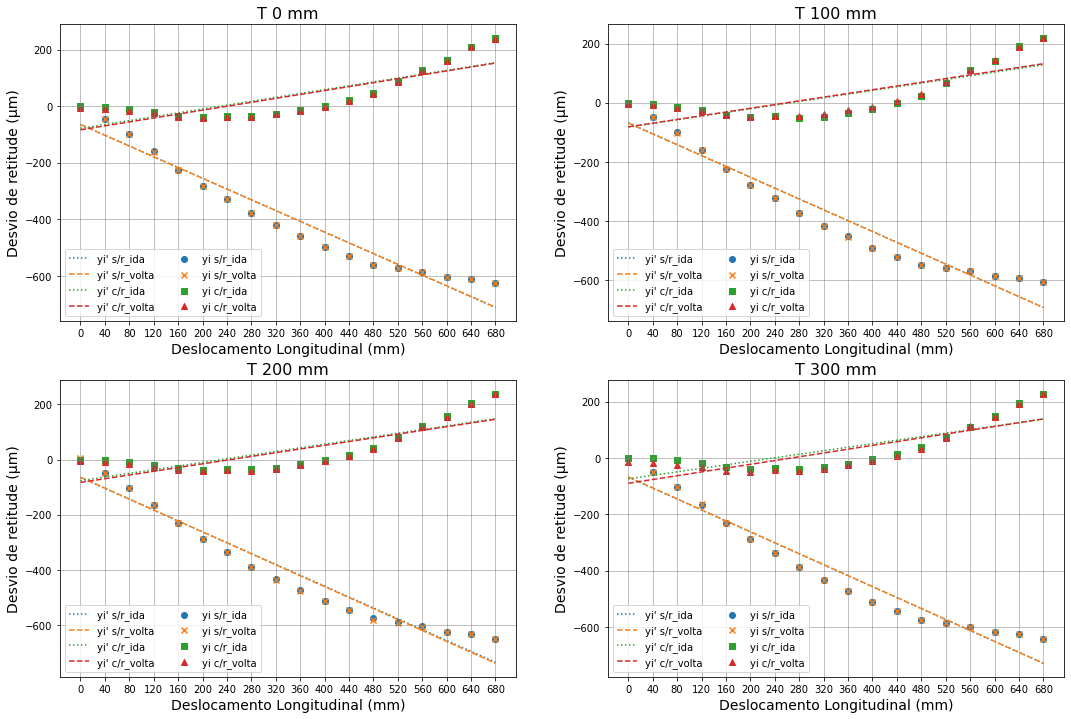

In [49]:
figura_desalinhamento = plt.figure(figsize = (18,12))

figura_desalinhamento.add_subplot(221)
desalinhamento(dados_0mm_semrev_ida, dados_0mm_semrev_volta, dados_0mm_comrev_ida, dados_0mm_comrev_volta)
plt.title('T 0 mm', fontsize = 16)

figura_desalinhamento.add_subplot(222)
desalinhamento(dados_100mm_semrev_ida, dados_100mm_semrev_volta, dados_100mm_comrev_ida, dados_100mm_comrev_volta)
plt.title('T 100 mm', fontsize = 16)

figura_desalinhamento.add_subplot(223)
desalinhamento(dados_200mm_semrev_ida, dados_200mm_semrev_volta, dados_200mm_comrev_ida, dados_200mm_comrev_volta)
plt.title('T 200 mm', fontsize = 16)

figura_desalinhamento.add_subplot(224)
desalinhamento(dados_300mm_semrev_ida, dados_300mm_semrev_volta, dados_300mm_comrev_ida, dados_300mm_comrev_volta)
plt.title('T 300 mm', fontsize = 16)

plt.savefig('grafico_desalinhamento.png') # salvando o gráfico

plt.show()

## Correção do Desalinhamento

### Função genérica para plotar gráficos alinhados

In [50]:
def alinhamento (df_semrev_ida, df_semrev_volta, df_comrev_ida, df_comrev_volta):
    plt.plot(df_semrev_ida['Posição (mm)'], df_semrev_ida['Resultado alinhado médio'], label = "s/r ida", marker = 'o', ls = '-')
    plt.plot(df_semrev_volta['Posição (mm)'], df_semrev_volta['Resultado alinhado médio'], label = "s/r volta", marker = 'x', ls = '--')
    plt.plot(df_comrev_ida['Posição (mm)'], df_comrev_ida['Resultado alinhado médio'], label = "c/r ida", marker = 's', ls='-.')
    plt.plot(df_comrev_volta['Posição (mm)'], df_comrev_volta['Resultado alinhado médio'], label = "c/r volta", marker='^', ls=':')

    plt.xlabel("Deslocamento Longitudinal (mm)", fontsize = 14)
    plt.ylabel("Desvio de retitude (\u03BCm)", fontsize = 14)
    plt.legend(loc=9, ncol=2)
    plt.grid(color='grey', ls='-', lw=0.5)
    plt.xticks(df_semrev_ida['Posição (mm)'])

### Plotando gráficos alinhados

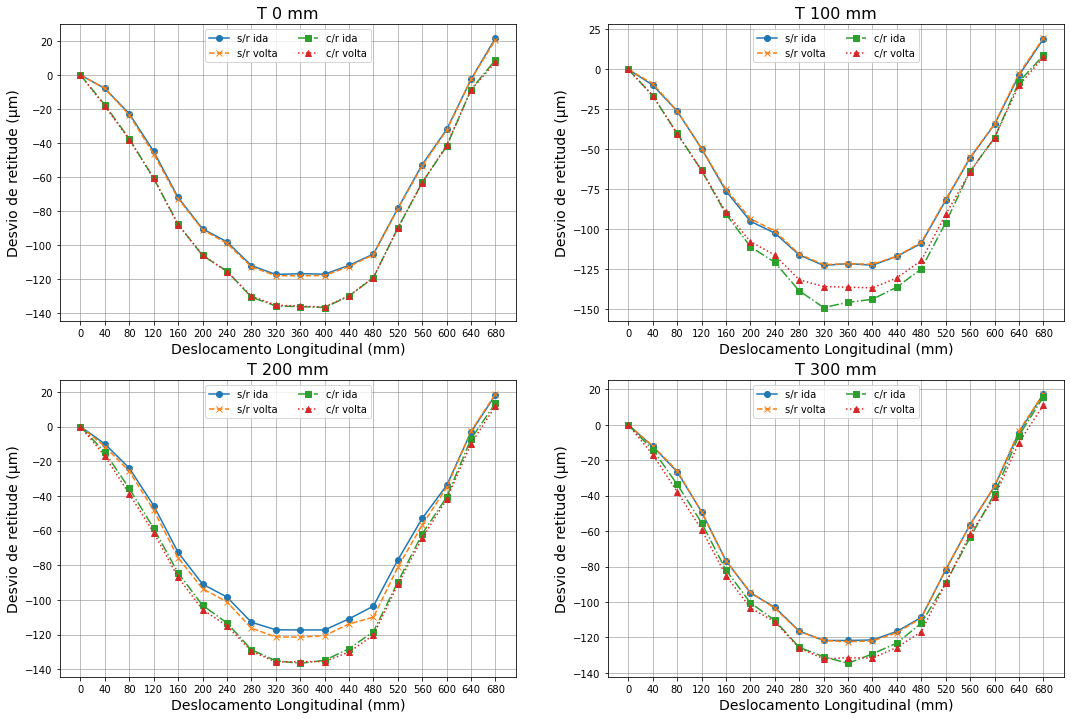

In [51]:
figura_alinhada = plt.figure(figsize = (18,12))

figura_alinhada.add_subplot(221)
alinhamento(dados_0mm_semrev_ida, dados_0mm_semrev_volta, dados_0mm_comrev_ida, dados_0mm_comrev_volta)
plt.title('T 0 mm', fontsize = 16)

figura_alinhada.add_subplot(222)
alinhamento(dados_100mm_semrev_ida, dados_100mm_semrev_volta, dados_100mm_comrev_ida, dados_100mm_comrev_volta)
plt.title('T 100 mm', fontsize = 16)

figura_alinhada.add_subplot(223)
alinhamento(dados_200mm_semrev_ida, dados_200mm_semrev_volta, dados_200mm_comrev_ida, dados_200mm_comrev_volta)
plt.title('T 200 mm', fontsize = 16)

figura_alinhada.add_subplot(224)
alinhamento(dados_300mm_semrev_ida, dados_300mm_semrev_volta, dados_300mm_comrev_ida, dados_300mm_comrev_volta)
plt.title('T 300 mm', fontsize = 16)

plt.savefig('grafico_alinhado.png') # salvando o gráfico

plt.show()

## Aplicando Método da Reversão de Artefato

### Criando função para promover a separação de erros, a partir do método de reversão de artefato proposto por Evans, Hocken e Estler (1996).

In [52]:
def reversao(df_semrev_ida, df_semrev_volta, df_comrev_ida, df_comrev_volta):
    rev_ida = pd.DataFrame()
    rev_ida['xi (mm)'] = df_semrev_ida['Posição (mm)']
    
    rev_volta = pd.DataFrame()
    rev_volta['xi (mm)'] = df_semrev_volta['Posição (mm)']
    
    # Medição 1
    rev_ida['Med1 I1(x) (\u03BCm)'] = df_semrev_ida['Resultado alinhado 1']
    rev_ida['Med1 I2(x) (\u03BCm)'] = df_comrev_ida['Resultado alinhado 1']
    rev_ida['Med1 M(x) (\u03BCm)'] = (rev_ida['Med1 I1(x) (\u03BCm)'] - rev_ida['Med1 I2(x) (\u03BCm)']) / 2
    rev_ida['Med1 S(x) (\u03BCm)'] = (rev_ida['Med1 I1(x) (\u03BCm)'] + rev_ida['Med1 I2(x) (\u03BCm)']) / 2

    rev_volta['Med1 I1(x) (\u03BCm)'] = df_semrev_volta['Resultado alinhado 1']
    rev_volta['Med1 I2(x) (\u03BCm)'] = df_comrev_volta['Resultado alinhado 1']
    rev_volta['Med1 M(x) (\u03BCm)'] = (rev_volta['Med1 I1(x) (\u03BCm)'] - rev_volta['Med1 I2(x) (\u03BCm)']) / 2
    rev_volta['Med1 S(x) (\u03BCm)'] = (rev_volta['Med1 I1(x) (\u03BCm)'] + rev_volta['Med1 I2(x) (\u03BCm)']) / 2
    
    # Medição 2
    rev_ida['Med2 I1(x) (\u03BCm)'] = df_semrev_ida['Resultado alinhado 2']
    rev_ida['Med2 I2(x) (\u03BCm)'] = df_comrev_ida['Resultado alinhado 2']
    rev_ida['Med2 M(x) (\u03BCm)'] = (rev_ida['Med2 I1(x) (\u03BCm)'] - rev_ida['Med2 I2(x) (\u03BCm)']) / 2
    rev_ida['Med2 S(x) (\u03BCm)'] = (rev_ida['Med2 I1(x) (\u03BCm)'] + rev_ida['Med2 I2(x) (\u03BCm)']) / 2

    rev_volta['Med2 I1(x) (\u03BCm)'] = df_semrev_volta['Resultado alinhado 2']
    rev_volta['Med2 I2(x) (\u03BCm)'] = df_comrev_volta['Resultado alinhado 2']
    rev_volta['Med2 M(x) (\u03BCm)'] = (rev_volta['Med2 I1(x) (\u03BCm)'] - rev_volta['Med2 I2(x) (\u03BCm)']) / 2
    rev_volta['Med2 S(x) (\u03BCm)'] = (rev_volta['Med2 I1(x) (\u03BCm)'] + rev_volta['Med2 I2(x) (\u03BCm)']) / 2
    
    # Medição 3
    rev_ida['Med3 I1(x) (\u03BCm)'] = df_semrev_ida['Resultado alinhado 3']
    rev_ida['Med3 I2(x) (\u03BCm)'] = df_comrev_ida['Resultado alinhado 3']
    rev_ida['Med3 M(x) (\u03BCm)'] = (rev_ida['Med3 I1(x) (\u03BCm)'] - rev_ida['Med3 I2(x) (\u03BCm)']) / 2
    rev_ida['Med3 S(x) (\u03BCm)'] = (rev_ida['Med3 I1(x) (\u03BCm)'] + rev_ida['Med3 I2(x) (\u03BCm)']) / 2

    rev_volta['Med3 I1(x) (\u03BCm)'] = df_semrev_volta['Resultado alinhado 3']
    rev_volta['Med3 I2(x) (\u03BCm)'] = df_comrev_volta['Resultado alinhado 3']
    rev_volta['Med3 M(x) (\u03BCm)'] = (rev_volta['Med3 I1(x) (\u03BCm)'] - rev_volta['Med3 I2(x) (\u03BCm)']) / 2
    rev_volta['Med3 S(x) (\u03BCm)'] = (rev_volta['Med3 I1(x) (\u03BCm)'] + rev_volta['Med3 I2(x) (\u03BCm)']) / 2
    
    # Medição 4
    rev_ida['Med4 I1(x) (\u03BCm)'] = df_semrev_ida['Resultado alinhado 4']
    rev_ida['Med4 I2(x) (\u03BCm)'] = df_comrev_ida['Resultado alinhado 4']
    rev_ida['Med4 M(x) (\u03BCm)'] = (rev_ida['Med4 I1(x) (\u03BCm)'] - rev_ida['Med4 I2(x) (\u03BCm)']) / 2
    rev_ida['Med4 S(x) (\u03BCm)'] = (rev_ida['Med4 I1(x) (\u03BCm)'] + rev_ida['Med4 I2(x) (\u03BCm)']) / 2

    rev_volta['Med4 I1(x) (\u03BCm)'] = df_semrev_volta['Resultado alinhado 4']
    rev_volta['Med4 I2(x) (\u03BCm)'] = df_comrev_volta['Resultado alinhado 4']
    rev_volta['Med4 M(x) (\u03BCm)'] = (rev_volta['Med4 I1(x) (\u03BCm)'] - rev_volta['Med4 I2(x) (\u03BCm)']) / 2
    rev_volta['Med4 S(x) (\u03BCm)'] = (rev_volta['Med4 I1(x) (\u03BCm)'] + rev_volta['Med4 I2(x) (\u03BCm)']) / 2
    
    # Média
    rev_ida['I1(x) (\u03BCm)'] = df_semrev_ida['Resultado alinhado médio']
    rev_ida['I2(x) (\u03BCm)'] = df_comrev_ida['Resultado alinhado médio']
    rev_ida['M(x) (\u03BCm)'] = (rev_ida['I1(x) (\u03BCm)'] - rev_ida['I2(x) (\u03BCm)']) / 2
    rev_ida['S(x) (\u03BCm)'] = (rev_ida['I1(x) (\u03BCm)'] + rev_ida['I2(x) (\u03BCm)']) / 2

    rev_volta['I1(x) (\u03BCm)'] = df_semrev_volta['Resultado alinhado médio']
    rev_volta['I2(x) (\u03BCm)'] = df_comrev_volta['Resultado alinhado médio']
    rev_volta['M(x) (\u03BCm)'] = (rev_volta['I1(x) (\u03BCm)'] - rev_volta['I2(x) (\u03BCm)']) / 2
    rev_volta['S(x) (\u03BCm)'] = (rev_volta['I1(x) (\u03BCm)'] + rev_volta['I2(x) (\u03BCm)']) / 2
    
    # Variabilidade amostral - erro padrão
    rev_ida['Erro padrão'] = ((((rev_ida['Med1 M(x) (\u03BCm)'] - rev_ida['M(x) (\u03BCm)'])**2 + 
                                  (rev_ida['Med2 M(x) (\u03BCm)'] - rev_ida['M(x) (\u03BCm)'])**2 + 
                                  (rev_ida['Med3 M(x) (\u03BCm)'] - rev_ida['M(x) (\u03BCm)'])**2 + 
                                  (rev_ida['Med4 M(x) (\u03BCm)'] - rev_ida['M(x) (\u03BCm)'])**2) / 3)**0.5) / 2
    
    rev_volta['Erro padrão'] = ((((rev_volta['Med1 M(x) (\u03BCm)'] - rev_volta['M(x) (\u03BCm)'])**2 + 
                                  (rev_volta['Med2 M(x) (\u03BCm)'] - rev_volta['M(x) (\u03BCm)'])**2 + 
                                  (rev_volta['Med3 M(x) (\u03BCm)'] - rev_volta['M(x) (\u03BCm)'])**2 + 
                                  (rev_volta['Med4 M(x) (\u03BCm)'] - rev_volta['M(x) (\u03BCm)'])**2) / 3)**0.5) / 2
    
    return rev_ida, rev_volta

### Obtenção dos dados separados: M(x) - perfil de erros da máquina; S(x) - perfil de erros do artefato

In [53]:
reversao_0mm_ida, reversao_0mm_volta = reversao(dados_0mm_semrev_ida, dados_0mm_semrev_volta, 
                                                dados_0mm_comrev_ida, dados_0mm_comrev_volta)

reversao_100mm_ida, reversao_100mm_volta = reversao(dados_100mm_semrev_ida, dados_100mm_semrev_volta, 
                                                    dados_100mm_comrev_ida, dados_100mm_comrev_volta)

reversao_200mm_ida, reversao_200mm_volta = reversao(dados_200mm_semrev_ida, dados_200mm_semrev_volta, 
                                                    dados_200mm_comrev_ida, dados_200mm_comrev_volta)

reversao_300mm_ida, reversao_300mm_volta = reversao(dados_300mm_semrev_ida, dados_300mm_semrev_volta, 
                                                    dados_300mm_comrev_ida, dados_300mm_comrev_volta)

In [54]:
reversao_0mm_ida

,xi (mm),Med1 I1(x) (μm),Med1 I2(x) (μm),Med1 M(x) (μm),Med1 S(x) (μm),Med2 I1(x) (μm),Med2 I2(x) (μm),Med2 M(x) (μm),Med2 S(x) (μm),Med3 I1(x) (μm),...,Med3 S(x) (μm),Med4 I1(x) (μm),Med4 I2(x) (μm),Med4 M(x) (μm),Med4 S(x) (μm),I1(x) (μm),I2(x) (μm),M(x) (μm),S(x) (μm),Erro padrão
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,40,-7.371104,-17.587822,5.108359,-12.479463,-7.453560,-17.501238,5.023839,-12.477399,-8.220021,...,-12.893860,-8.752219,-17.878638,4.563209,-13.315428,-7.949226,-17.633849,4.842312,-12.791538,0.132292
2,80,-22.242208,-36.875645,7.316718,-29.558927,-22.707121,-37.102477,7.197678,-29.904799,-23.140041,...,-30.437719,-22.804438,-37.957276,7.576419,-30.380857,-22.723452,-37.417699,7.347123,-30.070575,0.080767
3,120,-44.113313,-60.463467,8.175077,-52.288390,-44.460681,-60.103715,7.821517,-52.282198,-45.460062,...,-53.181579,-45.556656,-61.135913,7.789628,-53.346285,-44.897678,-60.651548,7.876935,-52.774613,0.101545
4,160,-70.984417,-87.451290,8.233437,-79.217853,-71.114241,-86.704954,7.795356,-78.909598,-72.580083,...,-80.375439,-72.908875,-88.114551,7.602838,-80.511713,-71.896904,-87.610397,7.856747,-79.753651,0.133511
5,200,-89.455521,-105.639112,8.091796,-97.547317,-90.567802,-105.606192,7.519195,-98.086997,-90.700103,...,-98.569298,-90.561094,-106.093189,7.766047,-98.327141,-90.321130,-105.944247,7.811558,-98.132688,0.118814
6,240,-96.626625,-114.926935,9.150155,-105.776780,-97.421362,-114.807430,8.693034,-106.114396,-99.020124,...,-107.363158,-98.613313,-114.971827,8.179257,-106.792570,-97.920356,-115.103096,8.591370,-106.511726,0.214881
7,280,-110.897730,-129.014757,9.058514,-119.956244,-111.174923,-131.408669,10.116873,-121.291796,-112.540144,...,-122.007018,-112.765531,-129.650464,8.442466,-121.207998,-111.844582,-130.386945,9.271182,-121.115764,0.351839
8,320,-116.468834,-134.202580,8.866873,-125.335707,-116.828483,-136.609907,9.890712,-126.719195,-117.660165,...,-126.950877,-117.417750,-135.329102,8.955676,-126.373426,-117.093808,-135.595795,9.250993,-126.344801,0.231944
9,360,-116.039938,-134.390402,9.175232,-125.215170,-116.182043,-136.911146,10.364551,-126.546594,-116.980186,...,-127.144737,-117.269969,-135.307740,9.018885,-126.288854,-116.618034,-135.979644,9.680805,-126.298839,0.340986


## Resultado - Separação de Erros

### Perfil de Erros do Artefato - S(x)

In [55]:
def erro_artefato(rev_ida, rev_volta):
    plt.plot(rev_ida['xi (mm)'], rev_ida['S(x) (\u03BCm)'], label = "S(x) ida", marker = 'o', ls = '-')
    plt.plot(rev_volta['xi (mm)'], rev_volta['S(x) (\u03BCm)'], label = "S(x) volta", marker = 's', ls = '-')

    plt.xlabel("Deslocamento Longitudinal (mm)", fontsize = 14)
    plt.ylabel("Desvio de retitude (\u03BCm)", fontsize = 14)
    plt.legend(loc=9, ncol=2)
    plt.grid(color='grey', ls='-', lw=0.5)
    plt.xticks(rev_ida['xi (mm)'])

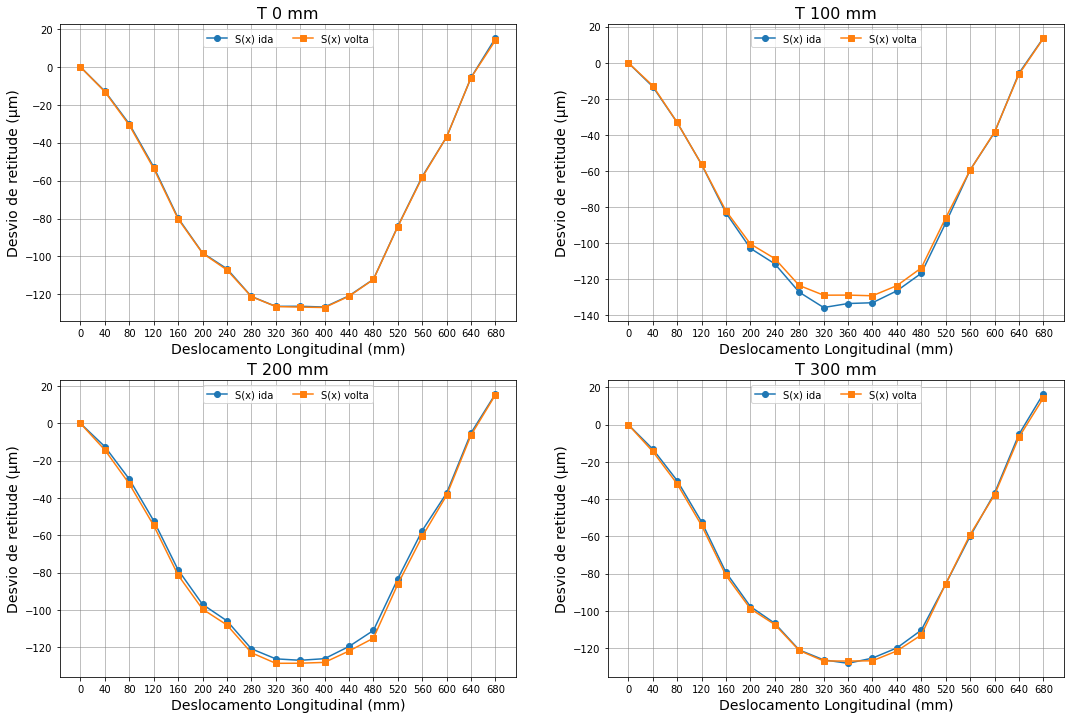

In [56]:
figura_erros_artefato = plt.figure(figsize = (18,12))

figura_erros_artefato.add_subplot(221)
erro_artefato(reversao_0mm_ida, reversao_0mm_volta)
plt.title('T 0 mm', fontsize = 16)

figura_erros_artefato.add_subplot(222)
erro_artefato(reversao_100mm_ida, reversao_100mm_volta)
plt.title('T 100 mm', fontsize = 16)

figura_erros_artefato.add_subplot(223)
erro_artefato(reversao_200mm_ida, reversao_200mm_volta)
plt.title('T 200 mm', fontsize = 16)

figura_erros_artefato.add_subplot(224)
erro_artefato(reversao_300mm_ida, reversao_300mm_volta)
plt.title('T 300 mm', fontsize = 16)

plt.savefig('grafico_erros_artefato.png') # salvando o gráfico

plt.show()

### Perfil de Erros da Máquina - M(x)

In [57]:
def erros_torno(rev_ida, rev_volta):
    plt.plot(rev_ida['xi (mm)'], rev_ida['M(x) (\u03BCm)'], label = "M(x) ida", marker = 'o', ls = '-', color='blue')
    plt.plot(rev_volta['xi (mm)'], rev_volta['M(x) (\u03BCm)'], label = "M(x) volta", marker = 's', ls = '-',color='orange')

    plt.xlabel("Deslocamento Longitudinal (mm)", fontsize = 14)
    plt.ylabel("Desvio de retitude (\u03BCm)", fontsize = 14)
    plt.legend(loc=1)
    plt.grid(color='grey', ls='-', lw=0.5)
    plt.xticks(rev_ida['xi (mm)'])
    plt.errorbar(rev_ida['xi (mm)'], rev_ida['M(x) (\u03BCm)'], yerr=rev_ida['Erro padrão'], ecolor='blue', 
                 barsabove=True, capsize = 4)
    plt.errorbar(rev_volta['xi (mm)'], rev_volta['M(x) (\u03BCm)'], yerr=rev_volta['Erro padrão'], ecolor='orange',
                 barsabove=True, capsize = 4)

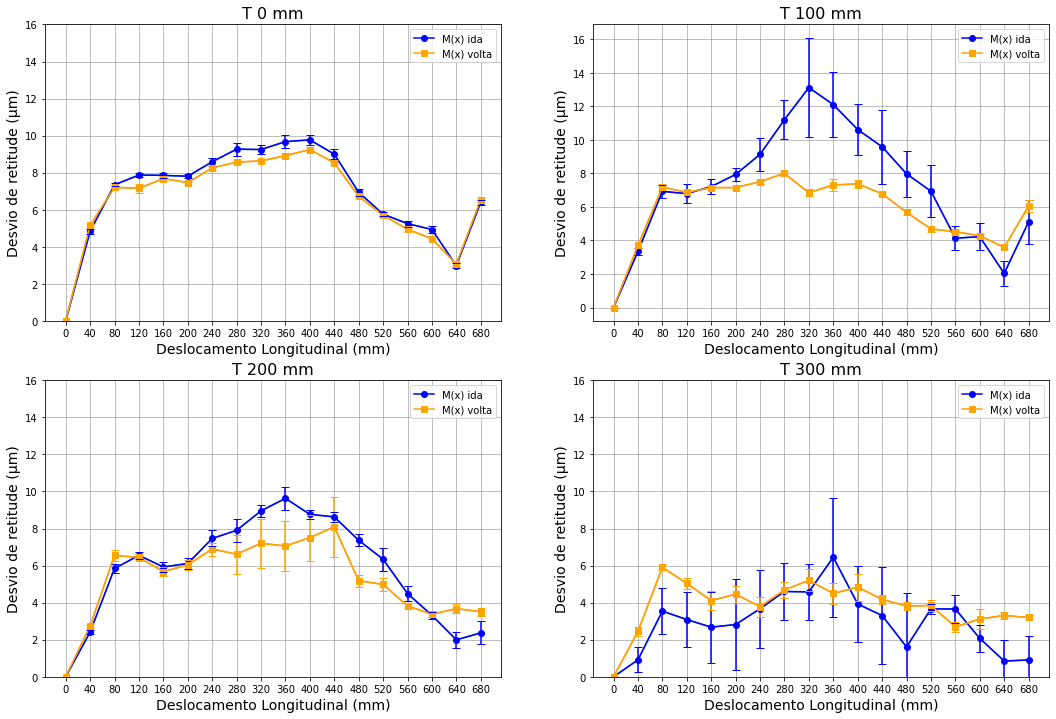

In [58]:
figura_erros_torno = plt.figure(figsize = (18,12))

figura_erros_torno.add_subplot(221)
erros_torno(reversao_0mm_ida, reversao_0mm_volta)
plt.title('T 0 mm', fontsize = 16)
plt.ylim(0,16)

figura_erros_torno.add_subplot(222)
erros_torno(reversao_100mm_ida, reversao_100mm_volta)
plt.title('T 100 mm', fontsize = 16)

figura_erros_torno.add_subplot(223)
erros_torno(reversao_200mm_ida, reversao_200mm_volta)
plt.title('T 200 mm', fontsize = 16)
plt.ylim(0,16)

figura_erros_torno.add_subplot(224)
erros_torno(reversao_300mm_ida, reversao_300mm_volta)
plt.title('T 300 mm', fontsize = 16)
plt.ylim(0,16)

plt.savefig('grafico_erros_torno.png') # salvando o gráfico

plt.show()

## Gráfico 3D

In [59]:
A1 = np.array(reversao_0mm_ida['xi (mm)'])
B1 = np.array([0, 100, 200, 300])

malha1 = np.meshgrid(A1, B1)

x_ida = malha1[0]
y_ida = malha1[1]

z_ida = np.array([reversao_0mm_ida['M(x) (\u03BCm)'], reversao_100mm_ida['M(x) (\u03BCm)'], 
              reversao_200mm_ida['M(x) (\u03BCm)'], reversao_300mm_ida['M(x) (\u03BCm)']])


A2 = np.array(reversao_0mm_volta['xi (mm)'])
B2 = np.array([0,100,200,300])

malha2 = np.meshgrid(A2, B2)

x_volta = malha2[0]
y_volta = malha2[1]

z_volta = np.array([reversao_0mm_volta['M(x) (\u03BCm)'], reversao_100mm_volta['M(x) (\u03BCm)'], 
              reversao_200mm_volta['M(x) (\u03BCm)'], reversao_300mm_volta['M(x) (\u03BCm)']])

z_ida

array([[ 0.        ,  4.84231166,  7.34712332,  7.87693498,  7.85674665,
         7.81155831,  8.59136997,  9.27118163,  9.25099329,  9.68080495,
         9.77311662,  9.00292828,  6.94523994,  5.7625516 ,  5.25486326,
         4.93467492,  2.98948658,  6.40679825],
       [ 0.        ,  3.34834881,  6.93419763,  6.79504644,  7.21839525,
         7.94174407,  9.14009288, 11.21344169, 13.12429051, 12.11013932,
        10.62098813,  9.59433695,  7.98018576,  6.94103457,  4.13938338,
         4.2252322 ,  2.03608101,  5.10942982],
       [ 0.        ,  2.4128612 ,  5.85072239,  6.55108359,  5.92644479,
         6.11430599,  7.46466718,  7.90252838,  8.95288958,  9.62825077,
         8.76611197,  8.62897317,  7.36683437,  6.34219556,  4.49255676,
         3.31791796,  1.99327915,  2.36864035],
       [ 0.        ,  0.91656347,  3.54562693,  3.0871904 ,  2.67875387,
         2.82031734,  3.6743808 ,  4.60344427,  4.58250774,  6.44907121,
         3.92813467,  3.30719814,  1.61126161,  3.665

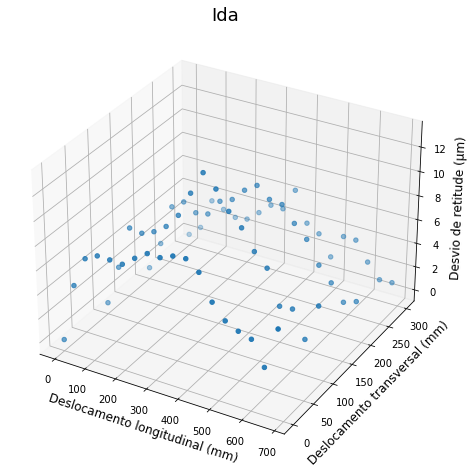

In [60]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')
surf = ax.scatter(x_ida, y_ida, z_ida)
ax.set_title('Ida', fontsize=18)
ax.set_xlabel('Deslocamento longitudinal (mm)', fontsize=12)
ax.set_ylabel('Deslocamento transversal (mm)', fontsize=12)
ax.set_zlabel('Desvio de retitude (\u03BCm)', fontsize=12)

plt.show()

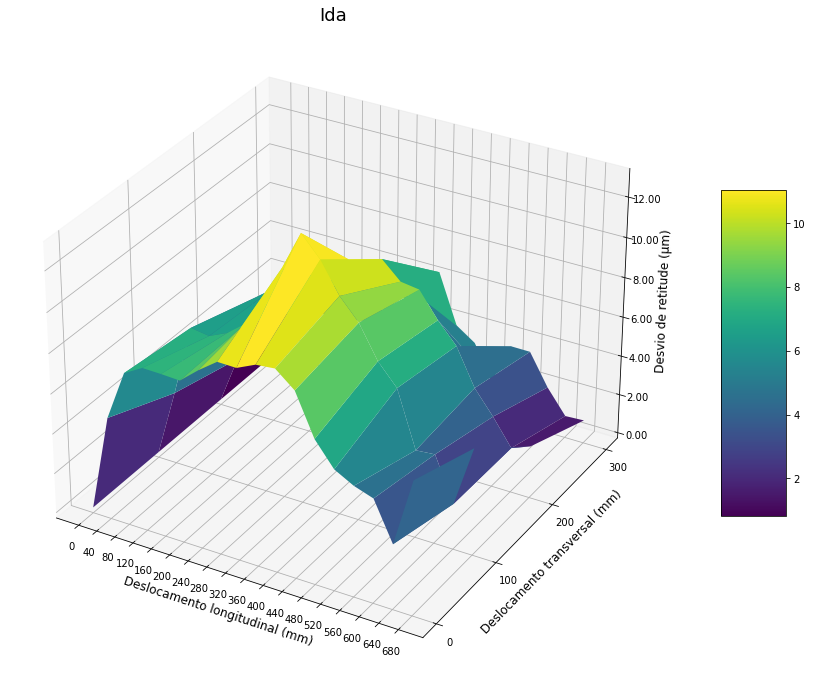

In [61]:
fig = plt.figure(figsize = (22, 12))


ax = fig.gca(projection = '3d')
surf = ax.plot_surface(x_ida, y_ida, z_ida, cmap = cm.viridis)
ax.set_title('Ida', fontsize=18)
ax.set_xlabel('Deslocamento longitudinal (mm)', fontsize=12)
ax.set_xticks(reversao_0mm_ida['xi (mm)'])
ax.set_ylabel('Deslocamento transversal (mm)', fontsize=12)
ax.set_yticks([300, 200, 100, 0])
ax.set_zlabel('Desvio de retitude (\u03BCm)', fontsize=12)

ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


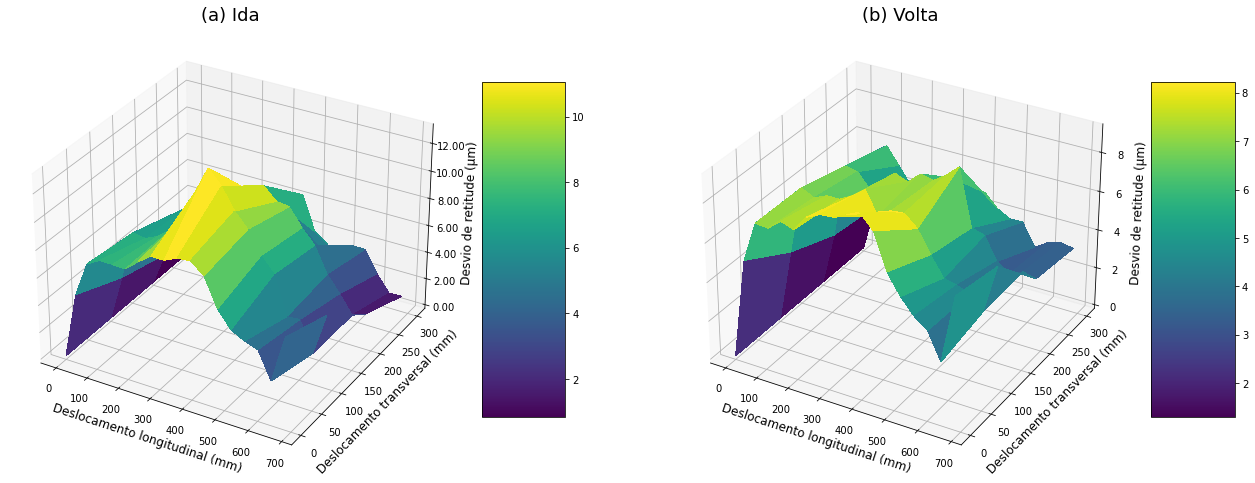

<Figure size 432x288 with 0 Axes>

In [62]:
fig = plt.figure(figsize=(22, 18))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface
surf1 = ax1.plot_surface(x_ida, y_ida, z_ida, rstride=1, cstride=1, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
ax1.set_title('(a) Ida', fontsize=18)
ax1.set_xlabel('Deslocamento longitudinal (mm)', fontsize=12)
ax1.set_ylabel('Deslocamento transversal (mm)', fontsize=12)
ax1.set_zlabel('Desvio de retitude (\u03BCm)', fontsize=12)

ax1.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf1, shrink=12, aspect=4)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('(b) Volta', fontsize=18)
ax2.set_xlabel('Deslocamento longitudinal (mm)', fontsize=12)
ax2.set_ylabel('Deslocamento transversal (mm)', fontsize=12)
# ax2.set_xticks(reversao_0mm_ida['xi (mm)'])
ax2.set_zlabel('Desvio de retitude (\u03BCm)', fontsize=12)
# plot a 3D surface
surf2 = ax2.plot_surface(x_volta, y_volta, z_volta, rstride=1, cstride=1, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
fig.colorbar(surf2, shrink=12, aspect=4)

plt.show()

plt.savefig('grafico_erros_3D.png') # salvando o gráfico

## Análises Estatísticas

### Análise de Variância - ANOVA

In [162]:
#comp_long_ida = np.array([reversao_0mm_ida['Med1 M(x) (μm)'], reversao_0mm_ida['Med2 M(x) (μm)'], 
              #reversao_0mm_ida['Med3 M(x) (μm)'], reversao_0mm_ida['Med4 M(x) (μm)']])
comp_long_ida = pd.DataFrame()
comp_long_ida['Med1 M(x) (μm)'] = reversao_0mm_ida['Med1 M(x) (μm)']
comp_long_ida['Med2 M(x) (μm)'] = reversao_0mm_ida['Med2 M(x) (μm)']
comp_long_ida['Med3 M(x) (μm)'] = reversao_0mm_ida['Med3 M(x) (μm)']
comp_long_ida['Med4 M(x) (μm)'] = reversao_0mm_ida['Med4 M(x) (μm)']
comp_long_ida.index = reversao_0mm_ida['xi (mm)']
comp_long_ida = comp_long_ida.drop(0) # Remove a linha do ponto de origem 0
comp_long_ida = comp_long_ida.stack()
comp_long_ida = np.vstack(comp_long_ida)
comp_long_ida = pd.DataFrame(comp_long_ida)
comp_long_ida.rename(columns={0: 'Y'}, inplace = True)
#comp_long_ida

x_long = pd.DataFrame()
x_long['Med1 M(x) (μm)'] = reversao_0mm_ida['xi (mm)']
x_long['Med2 M(x) (μm)'] = reversao_0mm_ida['xi (mm)']
x_long['Med3 M(x) (μm)'] = reversao_0mm_ida['xi (mm)']
x_long['Med4 M(x) (μm)'] = reversao_0mm_ida['xi (mm)']
x_long = x_long.drop(0)
#x_long = x_long.stack()
x_long = x_long.stack()
x_long = np.vstack(x_long)
comp_long_ida['x'] = x_long
comp_long_ida.groupby('x').groups
comp_long_ida

,Y,x
0,5.108359,40
1,5.023839,40
2,4.673839,40
3,4.563209,40
4,7.316718,80
...,...,...
63,2.861352,640
64,6.792105,680
65,6.155263,680
66,6.355263,680


In [163]:
model = ols('Y ~ x', data = comp_long_ida).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,37.442732,37.442732,11.158885,0.001379
Residual,66.0,221.457631,3.355419,NaN,NaN
